In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')
import seaborn as sns
import json
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')
import ast
import time
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\louij\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
train=pd.read_csv('train.csv')
train.head()
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [3]:
train.shape

(3000, 23)

In [4]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2008-06-04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2010-10-14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2003-09-12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2002-05-09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

# Exploratory Data Analysis

In [6]:
pandas_profiling.ProfileReport(train)

Number of variables,23
Number of observations,3000
Total Missing (%),8.1%
Total size in memory,539.1 KiB
Average record size in memory,184.0 B
Numeric,5
Categorical,16
Boolean,0
Date,0
Text (Unique),2
Rejected,0


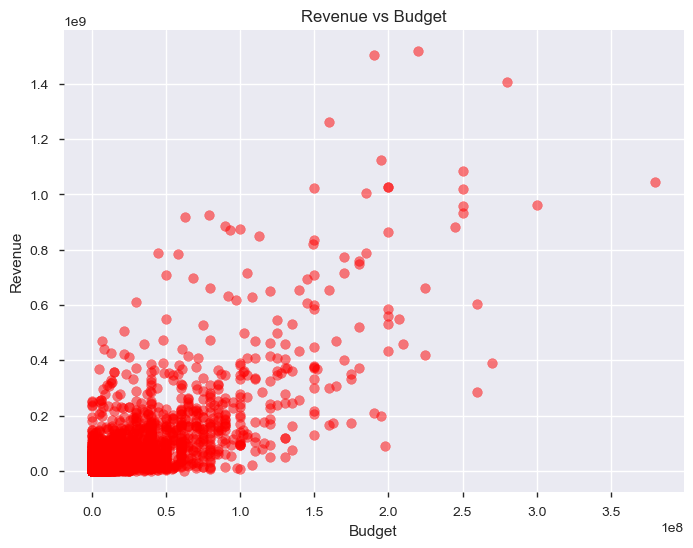

In [7]:

plt.figure(figsize=(8,6))
plt.scatter((train['budget']), (train['revenue']),color="red",alpha=0.5)
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show("budget_Revenue.png")


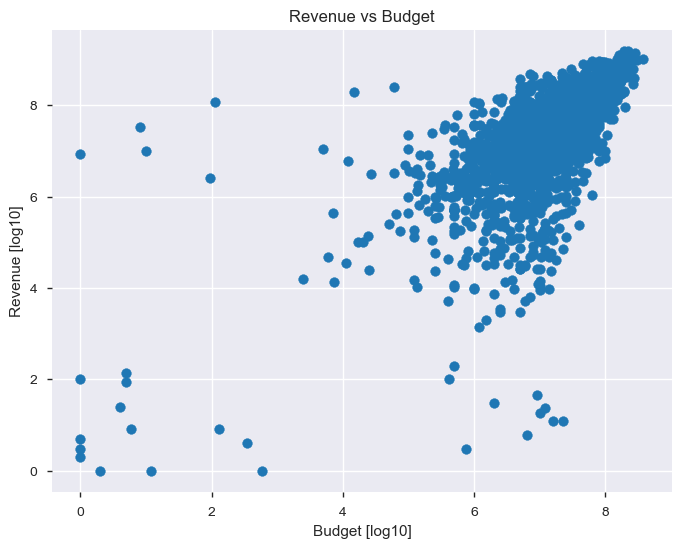

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(np.log10(train['budget']), np.log10(train['revenue']))
plt.title('Revenue vs Budget')
plt.xlabel('Budget [log10]')
plt.ylabel('Revenue [log10]')
plt.show()

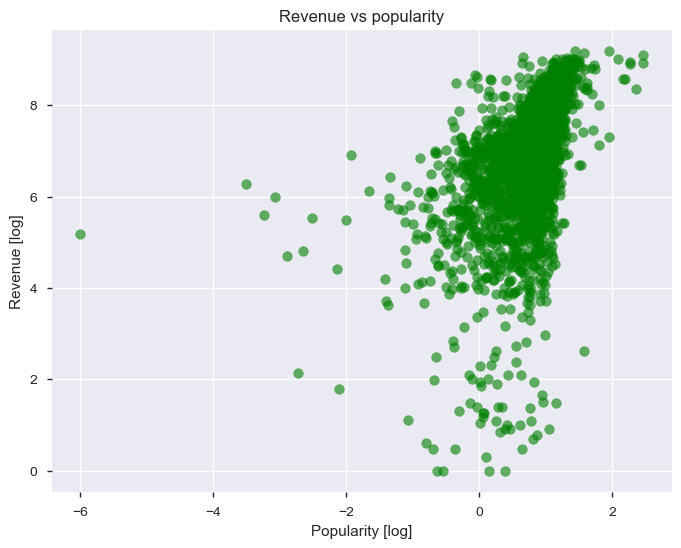

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(np.log10(train['popularity']), np.log10(train['revenue']),color="green",alpha=.6)
plt.title('Revenue vs popularity')
plt.xlabel('Popularity [log]')
plt.ylabel('Revenue [log]')
plt.show()

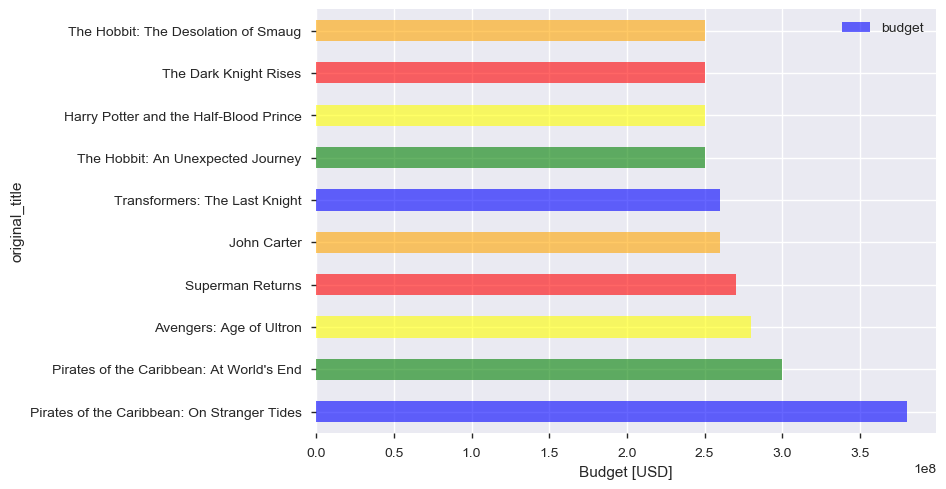

In [10]:
train.sort_values('budget', ascending=False).head(10).plot(x='original_title', y='budget', kind='barh',color=['blue','green','yellow','red','orange'],alpha=.6)

plt.xlabel('Budget [USD]');

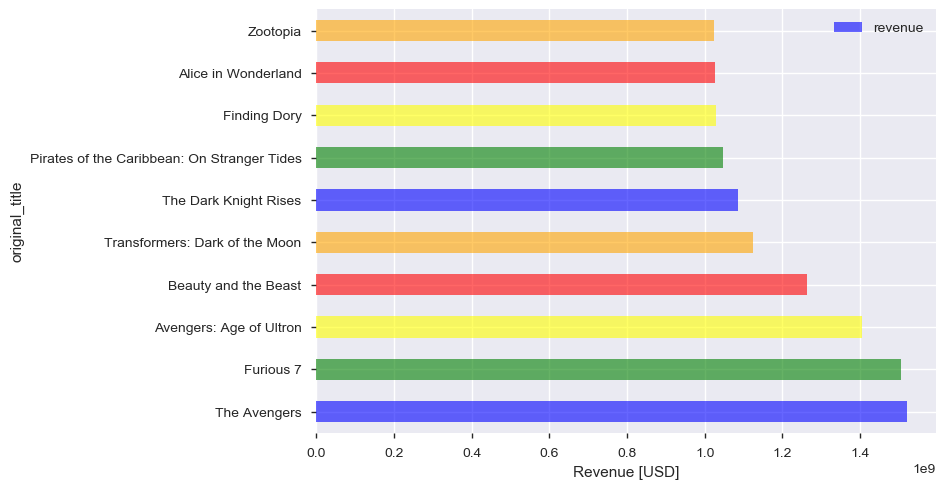

In [11]:
train.sort_values('revenue', ascending=False).head(10).plot(x='original_title', 
                                                            y='revenue', kind='barh',color=['blue','green','yellow','red','orange'],alpha=.6)
plt.xlabel('Revenue [USD]');

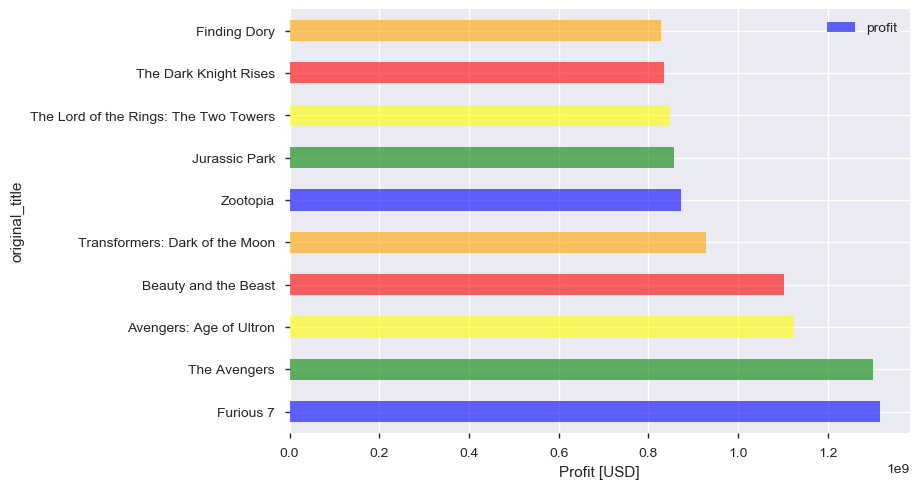

In [12]:
train.assign(profit = lambda df: df['revenue'] - df['budget'] ).sort_values('profit', 
                                   ascending=False).head(10).plot(x='original_title', 
                                                                  y='profit', kind='barh',color=['blue','green','yellow','red','orange'],alpha=.6)
plt.xlabel('Profit [USD]');

In [13]:
def parse_json(x):
    try:
        return json.loads(x.replace("'", '"'))[0]['name']
    except:
        return ''

In [14]:
train['genres'].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [15]:
train['genres_eda']=train['genres'].apply(parse_json)

In [16]:
train['genres_eda'].head(10)

0         Comedy
1         Comedy
2          Drama
3       Thriller
4         Action
5      Animation
6         Horror
7    Documentary
8         Action
9         Comedy
Name: genres_eda, dtype: object

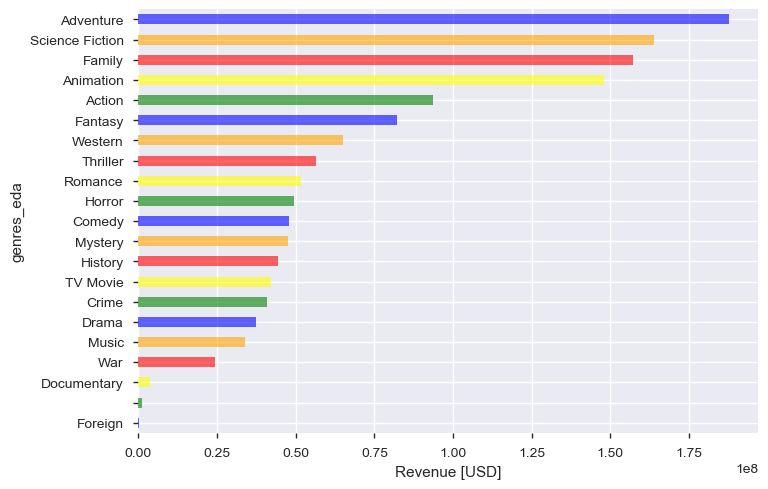

In [17]:
train.groupby('genres_eda')['revenue'].mean().sort_values().plot(kind='barh',color=['blue','green','yellow','red','orange'],alpha=.6)
plt.xlabel('Revenue [USD]');

In [18]:
train['collection'] = ~train['belongs_to_collection'].isna()

In [19]:
train['collection'].value_counts()

False    2396
True      604
Name: collection, dtype: int64

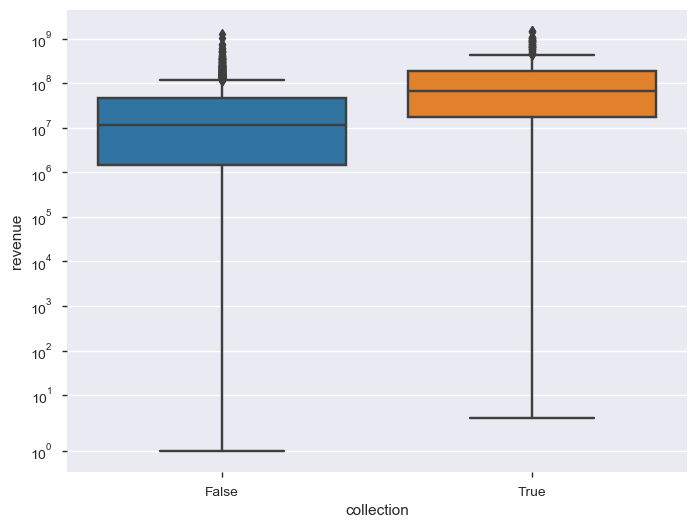

In [20]:
fig, ax= plt.subplots(figsize=(8,6))
ax.set_yscale('symlog')
sns.boxplot(x= 'collection', y='revenue', data=train, ax=ax);

# DATA CLEANING

In [21]:
# using SentimentIntensityAnalyzer function from the vaderSentiment package
# for an analysis of the sentiment of the films 'overview' and 'tagline'
analyser = SentimentIntensityAnalyzer()

In [22]:
# Fill out the NaNs values in 'overview' and 'tagline'
# with an empty string ('') before processing the analyser scores
train['overview'] = train['overview'].fillna('')
train['tagline'] = train['tagline'].fillna('')

In [23]:
# Sample of vaderSentiment usage
# The Sum of neg, neu, pos is always one
# 'copound' is a composition score of the other values 
analyser.polarity_scores(train['overview'].iloc[0])

{'neg': 0.069, 'neu': 0.747, 'pos': 0.184, 'compound': 0.6124}

In [24]:
# using only the 'compound' output of vaderSentiment on the 'overview' column
# 'compound' gathers the general picture related to sentiment analysis (Composition score)
# x.lower() will convert all the letters into lower case
train['sentiment'] = train['overview'].apply(lambda x: analyser.polarity_scores(x.lower())['compound'])

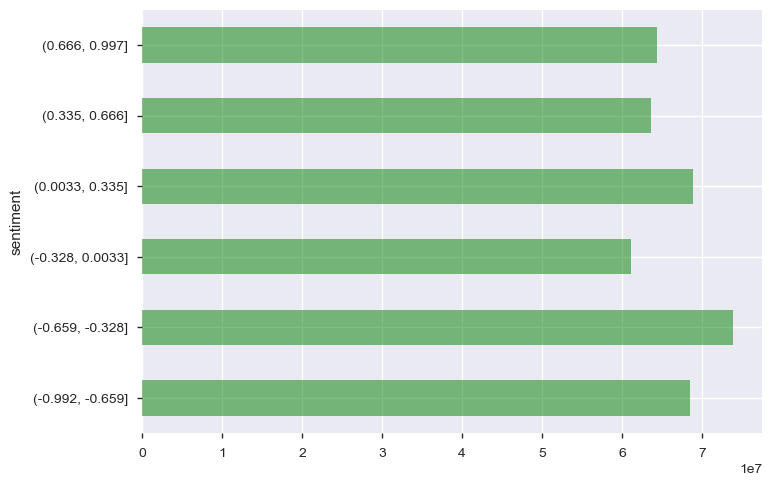

In [25]:
train.groupby(pd.cut(train['sentiment'], 6))['revenue'].mean().plot(kind='barh',color="green",alpha=0.5)

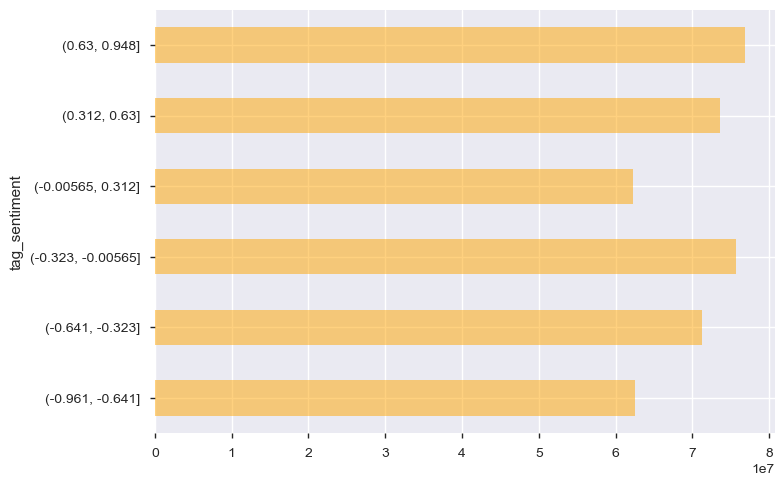

In [26]:
# using only the 'compound' output of vaderSentiment on the 'tagline' column
# 'compound' gathers the general picture related to sentiment analysis (Composition score)
train['tag_sentiment'] = train['tagline'].apply(lambda x: analyser.polarity_scores(x.lower())['compound'])
train.groupby(pd.cut(train['tag_sentiment'], 6))['revenue'].mean().plot(kind='barh',color="orange",alpha=0.5)

In [27]:
# As we can see from the sentiment analysis, there is (almost) no correlation between
# the 'compound' value generated by vaderSentiment package (a composition sentiment value)
# To the 'overview' and 'tagline' columns,
# hence, we will drop the 'overview', 'tagline' columns 
train[['tag_sentiment', 'sentiment']].corrwith(train['revenue'])

tag_sentiment    0.014699
sentiment       -0.020765
dtype: float64

In [28]:
def text_to_list(x):
    if pd.isna(x):
        return ''
    else:
        return ast.literal_eval(x)

In [29]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'genres_eda', 'collection', 'sentiment', 'tag_sentiment'],
      dtype='object')

In [30]:
train.drop(columns=['id','tag_sentiment', 'sentiment','genres_eda', 'poster_path', 'title', 'original_title'], inplace=True)

In [31]:
train.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,Keywords,cast,crew,revenue,collection
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,True
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-06-04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,True
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-10-14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,False
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2003-09-12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,False
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2002-05-09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,False


In [32]:
for col in ['genres', 'production_companies', 'production_countries', \
            'spoken_languages', 'Keywords', 'cast', 'crew']:
    train[col] = train[col].apply(text_to_list)

In [33]:
train['belongs_to_collection'].head()

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object

In [34]:
train['belongs_to_collection'] = 1*(~train['belongs_to_collection'].isna())

In [35]:
train['belongs_to_collection'].head()

0    1
1    1
2    0
3    0
4    0
Name: belongs_to_collection, dtype: int32

In [36]:
# Reminder, a Sentiment analysis Revealed that there is no correlation between
# the columns: 'overview' and 'tagline' to the 'revenue' column. (our predicted column)
# Hence, we will create a binary label for each movie 'tagline' (and for 'homepage' as well later) 
# (for every movie: has or has not a 'tagline' and a 'homepage')
# The second step will be to create a new feature with an overview of characters count.
train['tagline'] = 1*(~train['tagline'].isna())

In [37]:
train['tagline'].head()

0    1
1    1
2    1
3    1
4    1
Name: tagline, dtype: int32

In [38]:
train['homepage'] = 1*(~train['homepage'].isna())
train['homepage'].head()

0    0
1    0
2    1
3    1
4    0
Name: homepage, dtype: int32

In [39]:
# New feature includesthe number of characters in each movie's overview
train['overview']=train['overview'].str.len()
# train['overview'] =len( train['overview'].str())
# # Any movie without an overview (Nan) will set to zero
# train['overview'].fillna(0, inplace=True)
# train['overview'].head()
train.overview.head()

0    155
1    393
2    130
3    581
4    168
Name: overview, dtype: int64

In [40]:
train['overview'].fillna(0, inplace=True)
train.overview.head()

0    155
1    393
2    130
3    581
4    168
Name: overview, dtype: int64

In [41]:
# Create a new feature contains the NUMBER of genres for each movie
train['genre_number'] = train['genres'].apply(lambda x: len(x))

In [42]:
train['genre_number'].value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genre_number, dtype: int64

In [43]:
# function to parse the genre of a movie.
# few movies do not have a genre value, some have more than one genre value
# the function will parse only the first 3 genres (if exist)
# and create 3 new columns named: 'genres1', 'genres2', 'genres3'
# in the combined dataset.
def parse_genre(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['genres1', 'genres2', 'genres3'] )
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['genres1', 'genres2', 'genres3'] )
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['genres1', 'genres2', 'genres3'] )
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['genres1', 'genres2', 'genres3'] )

In [44]:
# Apply the function to create 3 new columns 
# and drop the original 'genres' column
train[['genres1', 'genres2', 'genres3']] = \
            train['genres'].apply(parse_genre)
train.drop(columns='genres', inplace=True)

In [45]:
train[['genres1','genres2', 'genres3']].head()

,genres1,genres2,genres3
0,Comedy,,
1,Comedy,Drama,Family
2,Drama,,
3,Thriller,Drama,
4,Action,Thriller,


In [46]:
train['production_companies'].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                     
4                                                     
Name: production_companies, dtype: object

In [47]:
train['production_company_number'] = \
        train['production_companies'].apply(lambda x: len(x))

In [48]:
def parse_production_companies(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['prod1', 'prod2', 'prod3'] )
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['prod1', 'prod2', 'prod3'] )
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['prod1', 'prod2', 'prod3'] )
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['prod1', 'prod2', 'prod3'] )

In [49]:
train[['prod1', 'prod2', 'prod3']] = \
    train['production_companies'].apply(parse_production_companies)
train.drop(columns='production_companies', inplace=True)

In [50]:
train[['prod1', 'prod2', 'prod3']].head()

,prod1,prod2,prod3
0,Paramount Pictures,United Artists,Metro-Goldwyn-Mayer (MGM)
1,Walt Disney Pictures,,
2,Bold Films,Blumhouse Productions,Right of Way Films
3,,,
4,,,


In [51]:
# Create a new column with the number of production countries 
# related to each movie 
train['production_country_number'] = \
        train['production_countries'].apply(lambda x: len(x))
train['production_country_number'].head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    2
7    0
8    1
9    1
Name: production_country_number, dtype: int64

In [52]:
def parse_production_countries(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['country1', 'country2', 'country3'] )
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['country1', 'country2', 'country3'] )
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['country1', 'country2', 'country3'] )
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['country1', 'country2', 'country3'] )

In [53]:
train[['country1', 'country2', 'country3']] = \
        train['production_countries'].apply(parse_production_countries)
train.drop(columns='production_countries', inplace=True)
train.head()

,belongs_to_collection,budget,homepage,imdb_id,original_language,overview,popularity,release_date,runtime,spoken_languages,...,genres2,genres3,production_company_number,prod1,prod2,prod3,production_country_number,country1,country2,country3
0,1,14000000,0,tt2637294,en,155,6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,,,3,Paramount Pictures,United Artists,Metro-Goldwyn-Mayer (MGM),1,United States of America,,
1,1,40000000,0,tt0368933,en,393,8.248895,2008-06-04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,Drama,Family,1,Walt Disney Pictures,,,1,United States of America,,
2,0,3300000,1,tt2582802,en,130,64.299990,2010-10-14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,,,3,Bold Films,Blumhouse Productions,Right of Way Films,1,United States of America,,
3,0,1200000,1,tt1821480,hi,581,3.174936,2003-09-12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,Drama,,0,,,,1,India,,
4,0,0,0,tt1380152,ko,168,1.148070,2002-05-09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",...,Thriller,,0,,,,1,South Korea,,


In [54]:
train['release_date'].head()

0       2/20/15
1    2008-06-04
2    2010-10-14
3    2003-09-12
4    2002-05-09
Name: release_date, dtype: object

In [55]:
# Parse and break-down the date column ('release_date' column)
train['release_date'] = pd.to_datetime(train['release_date'])

# Parse 'weekday'
train['weekday'] = train['release_date'].dt.weekday

# fill Nan in 'weekday' column with the most common weekday value - 4
train['weekday'].fillna(4, inplace=True)

# Parse 'month'
train['month'] = train['release_date'].dt.month

# fill Nan in 'month' with the most common month value - 9
train['month'].fillna(9, inplace=True)

# Parse 'year'
train['year'] = train['release_date'].dt.year

# fill Nan in 'year' with the median value of the 'year' column
train['year'].fillna(train['year'].median(), inplace=True)

# Parse 'day'
train['day'] = train['release_date'].dt.day

# fill Nan with the most common day value - 1
train['day'].fillna(1, inplace=True)

# Drop the original 'release_date' column
train.drop(columns =['release_date'], inplace=True)

In [56]:
train.head()

,belongs_to_collection,budget,homepage,imdb_id,original_language,overview,popularity,runtime,spoken_languages,status,...,prod2,prod3,production_country_number,country1,country2,country3,weekday,month,year,day
0,1,14000000,0,tt2637294,en,155,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,United Artists,Metro-Goldwyn-Mayer (MGM),1,United States of America,,,4,2,2015,20
1,1,40000000,0,tt0368933,en,393,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,,,1,United States of America,,,2,6,2008,4
2,0,3300000,1,tt2582802,en,130,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,Blumhouse Productions,Right of Way Films,1,United States of America,,,3,10,2010,14
3,0,1200000,1,tt1821480,hi,581,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...,,,1,India,,,4,9,2003,12
4,0,0,0,tt1380152,ko,168,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,...,,,1,South Korea,,,3,5,2002,9


In [57]:
# fill the Nan values in the 'runtime' column with the median value
train['runtime'].fillna(train['runtime'].median(), inplace=True)

In [58]:
train['spoken_languages_number'] = \
        train['spoken_languages'].apply(lambda x: len(x))

In [59]:
train['spoken_languages_number'].head()

0    1
1    1
2    1
3    2
4    1
Name: spoken_languages_number, dtype: int64

In [60]:
# function to parse the spoken languages of a movie.
# few movies do not have a spoken languages value, some have more than one value
# the function will parse only the first 3 spoken languages (if exist)
# and create 3 new columns named: 'lang1', 'lang2', 'lang3'

def parse_spoken_languages(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['lang1', 'lang2', 'lang3'])
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['lang1', 'lang2', 'lang3'])
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['lang1', 'lang2', 'lang3'])
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['lang1', 'lang2', 'lang3'])

In [61]:
# Apply the function to create 3 new columns and drop the original 'spoken languages' column
train[['lang1', 'lang2', 'lang3']] = train['spoken_languages'].apply(parse_spoken_languages)
train.drop(columns='spoken_languages', inplace=True)

In [62]:
train[['lang1', 'lang2', 'lang3']].head()

,lang1,lang2,lang3
0,English,,
1,English,,
2,English,,
3,English,हिन्दी,
4,한국어/조선말,,


In [63]:
train['status'].fillna('Released', inplace=True)

In [64]:
train['keywords_number'] = \
        train['Keywords'].apply(lambda x: len(x))
train['keywords_number'].value_counts()

5      293
0      276
4      248
3      228
6      227
2      207
7      192
1      187
8      161
9      134
11     132
10     125
12     100
13      85
14      59
15      59
16      58
17      45
18      29
20      24
21      23
19      22
22      17
23      15
24      12
27      12
25       6
26       5
32       2
28       2
30       2
31       2
29       2
37       2
43       1
40       1
38       1
33       1
97       1
39       1
149      1
Name: keywords_number, dtype: int64

In [65]:
def parse_keywords(x):
    if type(x) == str:
        return pd.Series(['','',''], index=['key1', 'key2', 'key3'])
    if len(x) == 1:
        return pd.Series([x[0]['name'],'',''], index=['key1', 'key2', 'key3'])
    if len(x) == 2:
        return pd.Series([x[0]['name'],x[1]['name'],''], index=['key1', 'key2', 'key3'])
    if len(x) > 2:
        return pd.Series([x[0]['name'],x[1]['name'],x[2]['name']], index=['key1', 'key2', 'key3'])

In [66]:
train[['key1', 'key2', 'key3']] = \
        train['Keywords'].apply(parse_keywords)
train.drop(columns='Keywords', inplace=True)

In [67]:
train['gender_0_number'] = train['cast'].apply(lambda row: sum([x['gender'] == 0 for x in row]))
train['gender_1_number'] = train['cast'].apply(lambda row: sum([x['gender'] == 1 for x in row]))
train['gender_2_number'] = train['cast'].apply(lambda row: sum([x['gender'] == 2 for x in row]))

In [68]:
train.head()

,belongs_to_collection,budget,homepage,imdb_id,original_language,overview,popularity,runtime,status,tagline,...,lang1,lang2,lang3,keywords_number,key1,key2,key3,gender_0_number,gender_1_number,gender_2_number
0,1,14000000,0,tt2637294,en,155,6.575393,93.0,Released,1,...,English,,,4,time travel,sequel,hot tub,6,8,10
1,1,40000000,0,tt0368933,en,393,8.248895,113.0,Released,1,...,English,,,4,coronation,duty,marriage,0,10,10
2,0,3300000,1,tt2582802,en,130,64.299990,105.0,Released,1,...,English,,,12,jazz,obsession,conservatory,31,7,13
3,0,1200000,1,tt1821480,hi,581,3.174936,122.0,Released,1,...,English,हिन्दी,,7,mystery,bollywood,police corruption,4,1,2
4,0,0,0,tt1380152,ko,168,1.148070,118.0,Released,1,...,한국어/조선말,,,0,,,,0,0,4


In [69]:
train.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'imdb_id',
       'original_language', 'overview', 'popularity', 'runtime', 'status',
       'tagline', 'cast', 'crew', 'revenue', 'collection', 'genre_number',
       'genres1', 'genres2', 'genres3', 'production_company_number', 'prod1',
       'prod2', 'prod3', 'production_country_number', 'country1', 'country2',
       'country3', 'weekday', 'month', 'year', 'day',
       'spoken_languages_number', 'lang1', 'lang2', 'lang3', 'keywords_number',
       'key1', 'key2', 'key3', 'gender_0_number', 'gender_1_number',
       'gender_2_number'],
      dtype='object')

In [70]:
train['cast_number'] =  train['cast'].apply(lambda x: len(x))

In [71]:
train['cast_number'].head()

0    24
1    20
2    51
3     7
4     4
Name: cast_number, dtype: int64

In [72]:
def parse_cast(x):
    myindx = ['cast1', 'cast2', 'cast3', 'cast4', 'cast5']
    out = [-1]*5
    if type(x) != str:
        for i in range(min([5,len(x)])):
            out[i] = x[i]['id']
    return pd.Series(out, index=myindx)

In [73]:
train[['cast1', 'cast2', 'cast3', 'cast4', 'cast5']] =train['cast'].apply(parse_cast)
train.drop(columns='cast', inplace=True)

In [74]:
train['crew_number'] = train['crew'].apply(lambda x: len(x))

In [75]:
train['crew_number'].head()

0    72
1     9
2    64
3     3
4     2
Name: crew_number, dtype: int64

In [76]:
def parse_crew(x):
    myindx = ['Director', 'Producer']
    out = [-1]*2
    if type(x) != str:
        for item in x:
            if item['job'] == 'Director':
                out[0] = item['id']
            elif item['job'] == 'Producer':
                out[1] = item['id']
    return pd.Series(out, index=myindx)

In [77]:
train[['Director', 'Producer']] = train['crew'].apply(parse_crew)
train.drop(columns='crew', inplace=True)
train[['Director', 'Producer']].head()

,Director,Producer
0,3227,57822
1,1201,59973
2,136495,1287961
3,95510,95510
4,84749,-1


In [78]:
"""To extract imbd rating for each movie using its imbd-ID"""
from urllib.request import urlopen
import json
apikey=["f5f3b212","4c83bf8a","5790f34b"]
apikey2=["bca0337a","55e4c1c3","f9f6d3a9","5790f34b"]

#train["imdbRating"]=""


# for x,elem in enumerate(train['imdb_id']):
#     if (x<1000):
#         key=apikey2[0]               
#     elif (999<x<1500):
#         key=apikey2[1]
#     elif(1499<x<2300):
#         key=apikey2[2]
#     elif(2299<x<3000):
#         key=apikey2[3]
#     movie_url = urlopen("http://www.omdbapi.com/?i="+str(elem)+"&apikey="+key)
#     movie_data = json.load(movie_url)
#     if movie_data['Response'] == "True": 
#         train["imdbRating"][x]=movie_data['imdbRating']
   
# train.to_csv(r'C:\Users\louij\OneDrive\Documents\tmdb-box-office-prediction\t.csv')     
 

In [79]:
T=pd.read_csv("t.csv")

In [80]:
train["imdbRating"]=T["imdbRating"].to_numpy()

In [81]:
train["imdbRating"].head()

0    5.1
1    5.8
2    8.5
3    8.1
4    5.7
Name: imdbRating, dtype: float64

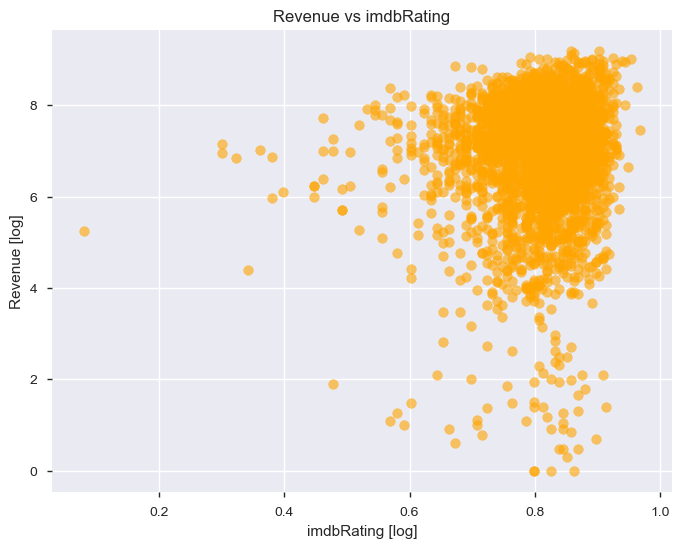

In [82]:
train["imdbRating"].fillna(train["imdbRating"].mean(), inplace = True) 
plt.figure(figsize=(8,6))
plt.scatter(np.log10(train['imdbRating']), np.log10(train['revenue']),color="orange",alpha=.6)
plt.title('Revenue vs imdbRating')
plt.xlabel('imdbRating [log]')
plt.ylabel('Revenue [log]')
plt.show()

  

In [83]:
train['revenue'].corr(train['imdbRating'])

0.14111737269131236

In [84]:
train.isnull().sum()

belongs_to_collection        0
budget                       0
homepage                     0
imdb_id                      0
original_language            0
overview                     0
popularity                   0
runtime                      0
status                       0
tagline                      0
revenue                      0
collection                   0
genre_number                 0
genres1                      0
genres2                      0
genres3                      0
production_company_number    0
prod1                        0
prod2                        0
prod3                        0
production_country_number    0
country1                     0
country2                     0
country3                     0
weekday                      0
month                        0
year                         0
day                          0
spoken_languages_number      0
lang1                        0
lang2                        0
lang3                        0
keywords

In [85]:
# Create two new columns (features) for the two columns that contain Numeric Values ('budget', 'popularity')
# using np.log1p (calculate log(1 + x)) since there is a possibility that we will have a zero value
# and log of zero does not exist.
# RandomForest or light_gbm models can use both features without a conflict,
# moreover, these two new features contribute to the models' accuracy.
train['budget_log'] = np.log1p(train['budget'])
train['pop_log'] = np.log1p(train['popularity'])

In [86]:
train['imdbRating_bin'] = pd.cut(x=train['imdbRating'], bins=[0, 4, 6.5,10], labels=['weak', 'moderate', 'strong'])
train['imdbRating_bin'].head()

0    moderate
1    moderate
2      strong
3      strong
4    moderate
Name: imdbRating_bin, dtype: category
Categories (3, object): [weak < moderate < strong]

###### Apply LabelEncoder on the the new generated columns, fit and transform as a second step


In [87]:
labeler = LabelEncoder() 
train['imdbRating_bin']= labeler.fit_transform(train['imdbRating_bin'])  
train['imdbRating_bin'].head()

0    0
1    0
2    1
3    1
4    0
Name: imdbRating_bin, dtype: int32

In [88]:
train['revenue'].corr(train['imdbRating_bin'])

0.06861519790977019

In [89]:
cols = ['genres1', 'genres2', 'genres3']
print(set(train[cols].values.ravel()))

{'', 'War', 'Mystery', 'TV Movie', 'Documentary', 'Romance', 'History', 'Animation', 'Action', 'Fantasy', 'Crime', 'Thriller', 'Western', 'Adventure', 'Drama', 'Science Fiction', 'Horror', 'Foreign', 'Comedy', 'Music', 'Family'}


In [90]:
cols = ['genres1', 'genres2', 'genres3']
allitems = list(set(train[cols].values.ravel().tolist()))
labeler.fit(allitems)
train[cols] = train[cols].apply(lambda x: labeler.transform(x))

In [91]:
train[['genres1', 'genres2', 'genres3']].head()

,genres1,genres2,genres3
0,4,0,0
1,4,7,8
2,7,0,0
3,18,7,0
4,1,18,0


In [92]:
cols = ['prod1', 'prod2', 'prod3']
allitems = list(set(train[cols].values.ravel().tolist()))
labeler.fit(allitems)
train[cols] = train[cols].apply(lambda x: labeler.transform(x))

In [93]:
cols = ['country1', 'country2', 'country3']
allitems = list(set(train[cols].values.ravel().tolist()))
labeler.fit(allitems)
train[cols] = train[cols].apply(lambda x: labeler.transform(x))

In [94]:
cols = ['lang1', 'lang2', 'lang3']
allitems = list(set(train[cols].values.ravel().tolist()))
labeler.fit(allitems)
train[cols] = train[cols].apply(lambda x: labeler.transform(x))

In [95]:
cols = ['key1', 'key2', 'key3']
allitems = list(set(train[cols].values.ravel().tolist()))
labeler.fit(allitems)
train[cols] = train[cols].apply(lambda x: labeler.transform(x))

In [96]:
train.select_dtypes('object').columns

Index(['imdb_id', 'original_language', 'status'], dtype='object')

In [97]:
train.columns

Index(['belongs_to_collection', 'budget', 'homepage', 'imdb_id',
       'original_language', 'overview', 'popularity', 'runtime', 'status',
       'tagline', 'revenue', 'collection', 'genre_number', 'genres1',
       'genres2', 'genres3', 'production_company_number', 'prod1', 'prod2',
       'prod3', 'production_country_number', 'country1', 'country2',
       'country3', 'weekday', 'month', 'year', 'day',
       'spoken_languages_number', 'lang1', 'lang2', 'lang3', 'keywords_number',
       'key1', 'key2', 'key3', 'gender_0_number', 'gender_1_number',
       'gender_2_number', 'cast_number', 'cast1', 'cast2', 'cast3', 'cast4',
       'cast5', 'crew_number', 'Director', 'Producer', 'imdbRating',
       'budget_log', 'pop_log', 'imdbRating_bin'],
      dtype='object')

In [98]:
train.head()

,belongs_to_collection,budget,homepage,imdb_id,original_language,overview,popularity,runtime,status,tagline,...,cast3,cast4,cast5,crew_number,Director,Producer,imdbRating,budget_log,pop_log,imdbRating_bin
0,1,14000000,0,tt2637294,en,155,6.575393,93.0,Released,1,...,54729,36801,54812,72,3227,57822,5.1,16.454568,2.024905,0
1,1,40000000,0,tt0368933,en,393,8.248895,113.0,Released,1,...,1210,655,33656,9,1201,59973,5.8,17.504390,2.224504,0
2,0,3300000,1,tt2582802,en,130,64.299990,105.0,Released,1,...,129104,970216,223012,64,136495,1287961,8.5,15.009433,4.178992,1
3,0,1200000,1,tt1821480,hi,581,3.174936,122.0,Released,1,...,1021524,1093644,86033,3,95510,95510,8.1,13.997833,1.429099,1
4,0,0,0,tt1380152,ko,168,1.148070,118.0,Released,1,...,84752,1130534,-1,2,84749,-1,5.7,0.000000,0.764570,0


In [99]:
train[['imdb_id','imdbRating_bin']].head()

,imdb_id,imdbRating_bin
0,tt2637294,0
1,tt0368933,0
2,tt2582802,1
3,tt1821480,1
4,tt1380152,0


In [100]:
train.drop(['imdb_id','imdbRating_bin','collection'],1,inplace=True)

In [101]:
train.head()

,belongs_to_collection,budget,homepage,original_language,overview,popularity,runtime,status,tagline,revenue,...,cast2,cast3,cast4,cast5,crew_number,Director,Producer,imdbRating,budget_log,pop_log
0,1,14000000,0,en,155,6.575393,93.0,Released,1,12314651,...,64342,54729,36801,54812,72,3227,57822,5.1,16.454568,2.024905
1,1,40000000,0,en,393,8.248895,113.0,Released,1,95149435,...,5823,1210,655,33656,9,1201,59973,5.8,17.504390,2.224504
2,0,3300000,1,en,130,64.299990,105.0,Released,1,13092000,...,18999,129104,970216,223012,64,136495,1287961,8.5,15.009433,4.178992
3,0,1200000,1,hi,581,3.174936,122.0,Released,1,16000000,...,85047,1021524,1093644,86033,3,95510,95510,8.1,13.997833,1.429099
4,0,0,0,ko,168,1.148070,118.0,Released,1,3923970,...,64453,84752,1130534,-1,2,84749,-1,5.7,0.000000,0.764570


In [102]:
data_dummy= train.copy()
cat_col = train.select_dtypes('object').columns
data_dummy[cat_col] = data_dummy[cat_col][cat_col].apply(lambda x: LabelEncoder().fit_transform(x))


SCALING

In [103]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()


SPLIT DATA TO TRAIN AND TEST

In [104]:
from sklearn.model_selection import train_test_split
x=data_dummy.drop('revenue',1).values
y=data_dummy.revenue.values.reshape(-1,1)
X = scaler.fit_transform(x)
y = scaler.fit_transform(y)
# xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2, random_state = 0)


# MODELLING

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

LINEAR REGRESSION

Text(0, 0.5, 'Predicted Y')

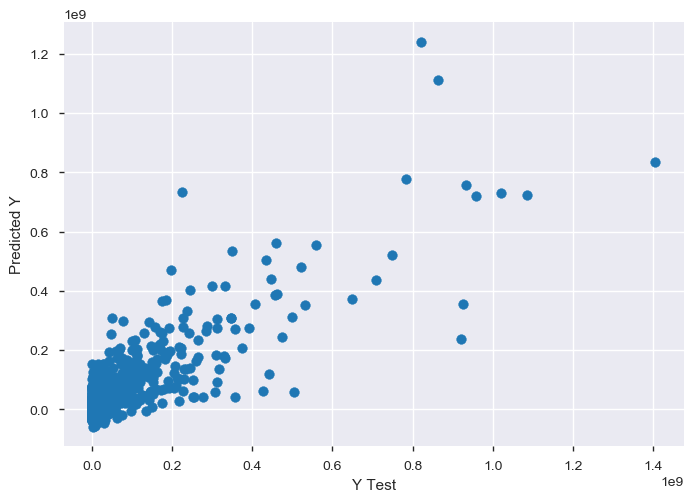

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#train the model
model = LinearRegression()
model.fit(X_train,y_train)
model.coef_
#see performance score 
model.score(X_test,y_test)
#prediction
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(len(y_pred),1)).reshape(len(y_pred))
y_test = scaler.inverse_transform(y_test.reshape(len(y_test),1)).reshape(len(y_test))
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [107]:
from sklearn import metrics
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score               : '+str(metrics.r2_score(y_test, y_pred)))



Mean Absolute Error    : 47330695.80195832
Mean Squared Error     : 6908810625467915.0
Root Mean Squared Error: 83119255.44341645
R2 score               : 0.6820687652899325


Randomforest

In [119]:
rf = RandomForestRegressor()
#X_train, X_test, y_train, y_test
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test) 
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score               : '+str(metrics.r2_score(y_test, y_pred)))


Mean Absolute Error    : 74088716.66087939
Mean Squared Error     : 2.721965635994914e+16
Root Mean Squared Error: 164983806.35671228
R2 score               : -0.2526004002774733


Feature importance in RandomForest

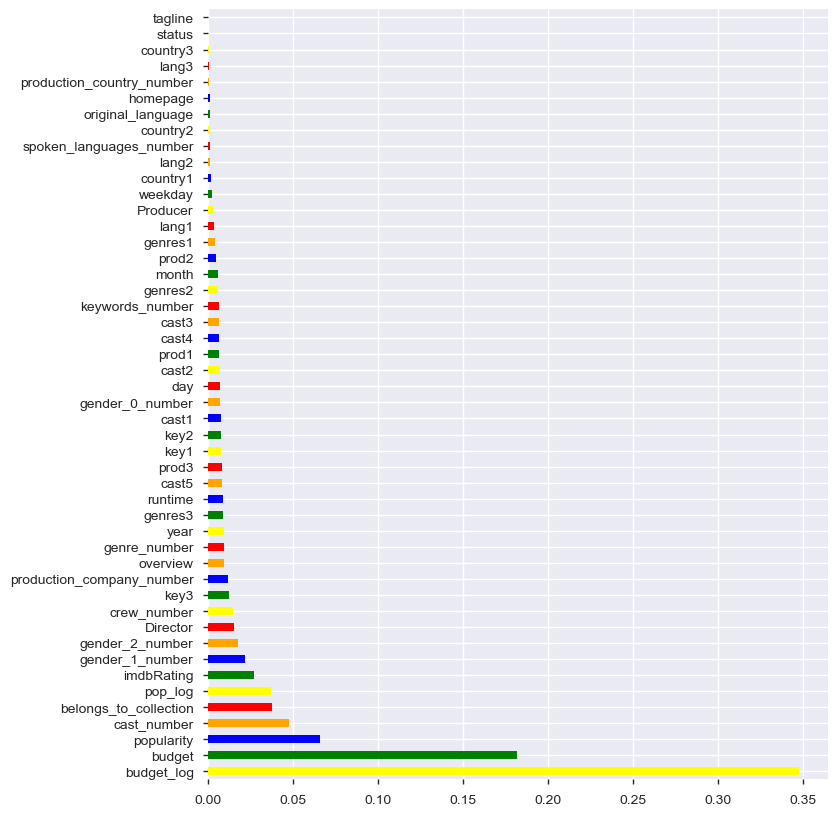

In [109]:
imp = pd.Series(rf.feature_importances_, index=data_dummy.drop(columns='revenue').columns)
imp.sort_values(ascending=False).plot(kind='barh', figsize=(8,10),color=['yellow','green','blue','orange','red'])

LightGBM

In [117]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
kf = KFold(n_splits=5, shuffle=True, random_state=123)
lgb_model = lgb.LGBMRegressor(num_leaves=20, max_depth=-1, learning_rate=0.01, 
                              metrics='rmse', n_estimators=1500, feature_fraction = 0.4)
#X_train, X_test, y_train, y_test
y_pred = cross_val_predict(lgb_model, X_train, y_train, cv=kf)


print('RMSLE: {0:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_pred))))


RMSLE: 0.56


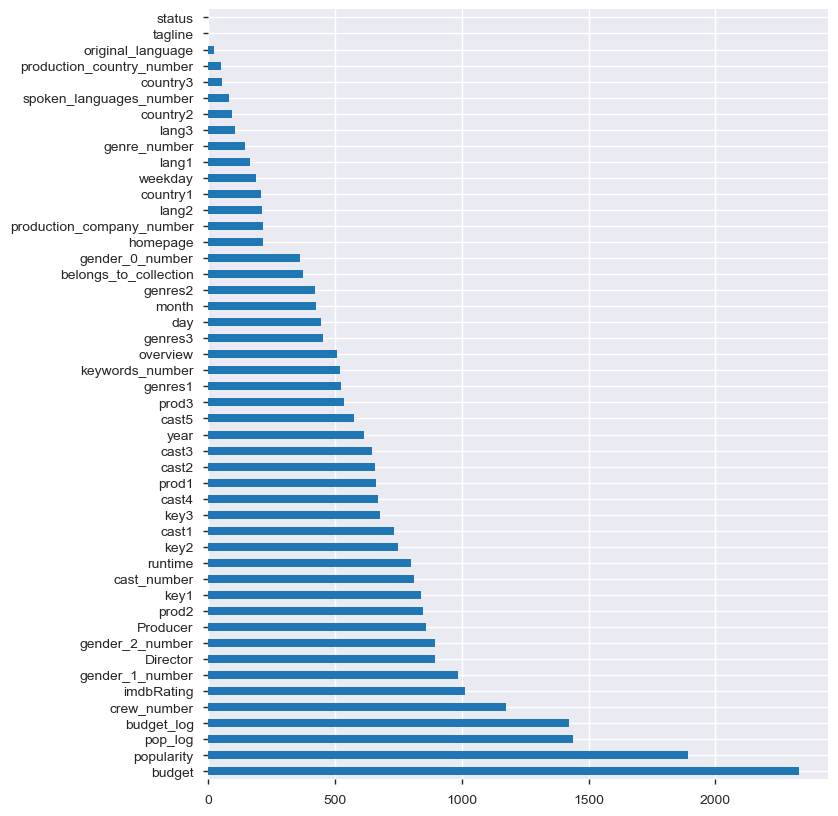

In [115]:
lgb_model.fit(X_train, y_train)
imp = pd.Series(lgb_model.feature_importances_, index=data_dummy.drop(columns='revenue').columns)
imp.sort_values(ascending=False).plot(kind='barh', figsize=(8,10))